#### Importing the libraries :-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

import warnings
warnings.filterwarnings("ignore")
print("Module and Packages imported successfully.....!")

Module and Packages imported successfully.....!


#### Loading dataset :-

In [2]:
train_dir = "C:/Users/Ganpati Kumar Roy/College Work/IOT-Paper/Final Model/10 Class Fruit Image Dataset/Training/"
val_dir = "C:/Users/Ganpati Kumar Roy/College Work/IOT-Paper/Final Model/10 Class Fruit Image Dataset/Validation/"

#### Data reading :- 

In [3]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples=get_files(val_dir) 
print("Classes are :- ", num_classes)
print("Total train images :-", train_samples)
print("Total validation images :-", val_samples)

Classes are :-  10
Total train images :- 27439
Total validation images :- 6845


#### Data Preprocessing

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

In [6]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
validation_generator = validation_datagen.flow_from_directory(
                                                    val_dir, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size) 

Found 27439 images belonging to 10 classes.
Found 6845 images belonging to 10 classes.


In [7]:
train_generator.class_indices

{'Apples': 0,
 'Banana': 1,
 'Guava': 2,
 'Kiwi': 3,
 'Mango': 4,
 'Muskmelon': 5,
 'Orange': 6,
 'Peach': 7,
 'Pear': 8,
 'Pomegranate': 9}

#### VGG-16 Parameter Building

In [8]:
vgg = VGG16(input_shape=(256,256,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

In [9]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy','Recall'])
train=model.fit(train_generator,
                          epochs=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples // batch_size,
                          verbose=1)

Epoch 1/10
857/857 [==============================] - 6682s 8s/step - loss: 0.2823 - accuracy: 0.9138 - recall: 0.8924 - val_loss: 1.7447 - val_accuracy: 0.6703 - val_recall: 0.6508
Epoch 2/10
857/857 [==============================] - 6540s 8s/step - loss: 0.1037 - accuracy: 0.9665 - recall: 0.9628 - val_loss: 1.4688 - val_accuracy: 0.7366 - val_recall: 0.7287
Epoch 3/10
857/857 [==============================] - 6435s 8s/step - loss: 0.1099 - accuracy: 0.9671 - recall: 0.9653 - val_loss: 2.2241 - val_accuracy: 0.6901 - val_recall: 0.6852
Epoch 4/10
857/857 [==============================] - 6593s 8s/step - loss: 0.1015 - accuracy: 0.9712 - recall: 0.9706 - val_loss: 1.8195 - val_accuracy: 0.7202 - val_recall: 0.7158
Epoch 5/10
857/857 [==============================] - 6938s 8s/step - loss: 0.0805 - accuracy: 0.9764 - recall: 0.9757 - val_loss: 2.2172 - val_accuracy: 0.7242 - val_recall: 0.7207
Epoch 6/10
857/857 [==============================] - 6730s 8s/step - loss: 0.0726 - accur

#### Model Save :-

In [10]:
from tensorflow.keras.models import load_model
model.save('GV-VGG16.h5')

#### Accuracy Graph :-

In [11]:
train.history

{'loss': [0.28234532475471497,
  0.10371973365545273,
  0.10986460000276566,
  0.10145355015993118,
  0.08052337914705276,
  0.07262472063302994,
  0.08441145718097687,
  0.0827876627445221,
  0.07398587465286255,
  0.0517292395234108],
 'accuracy': [0.9138176441192627,
  0.9664683938026428,
  0.9670522212982178,
  0.971248209476471,
  0.9763928651809692,
  0.9810267686843872,
  0.978983461856842,
  0.9790199398994446,
  0.9833254218101501,
  0.9871200919151306],
 'recall': [0.8923632502555847,
  0.9628196954727173,
  0.9652643203735352,
  0.9705549478530884,
  0.9756996631622314,
  0.9806253910064697,
  0.978764533996582,
  0.9785821437835693,
  0.9831429719924927,
  0.9869011640548706],
 'val_loss': [1.7447317838668823,
  1.468826174736023,
  2.224071741104126,
  1.8195216655731201,
  2.2172462940216064,
  4.4217634201049805,
  2.748133659362793,
  3.0089449882507324,
  2.609715700149536,
  4.589061737060547],
 'val_accuracy': [0.67033451795578,
  0.7366490364074707,
  0.690140843391

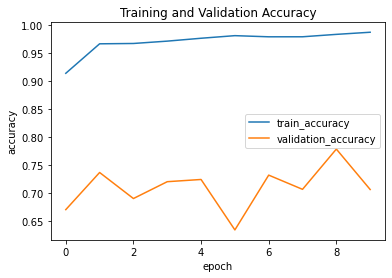

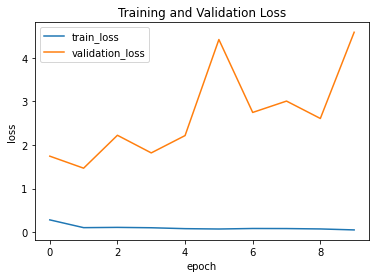

In [12]:
def plot_accuracy(train,title):
    plt.title(title)
    plt.plot(train.history['accuracy']) 
    plt.plot(train.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(train,title):
    plt.title(title)
    plt.plot(train.history['loss'])
    plt.plot(train.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

    
plot_accuracy(train,'Training and Validation Accuracy')
plot_loss(train,'Training and Validation Loss')

#### Confusion Matrix :-

##### Training :-

In [13]:
# train_generator.reset()
predictions = model.predict_generator(generator = train_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = train_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.


In [14]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = train_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [15]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("green")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

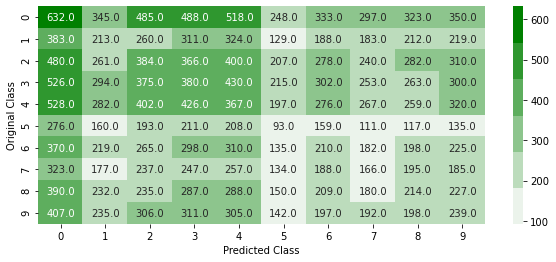

In [16]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 